Atlas Segmentierung

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nilearn import image
from nilearn import plotting 
from nilearn.connectome import ConnectivityMeasure
import nibabel as nib

path = "/Users/leoschild/Desktop/LEO/RSDS/100307/MNINonLinear/Results/rfMRI_REST1_LR/rfMRI_REST1_LR.nii"
Nifti_img = nib.nifti1.load(path)
Dataset = image.get_data(Nifti_img)

In [78]:
print("Data shape: ", Dataset.shape)
print("Data dtype: ", Dataset.dtype)

Data shape:  (91, 109, 91, 1200)
Data dtype:  float32


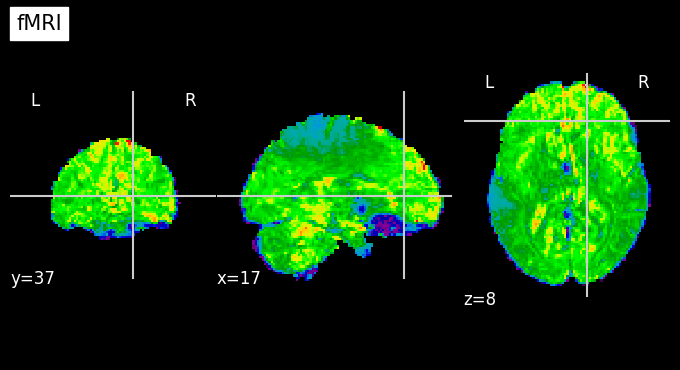

In [79]:
# Visualisiere ein Beispielbild der fMRI-Daten
plotting.plot_epi(Nifti_img.slicer[:, :, :, 0], title='fMRI')

In [80]:
from nilearn import datasets
dataset = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-2mm')
atlas_filename = dataset.maps
labels = dataset.labels

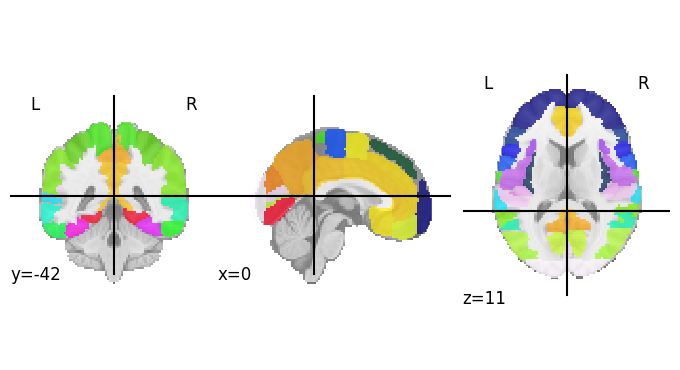

In [81]:
plotting.plot_roi(atlas_filename)

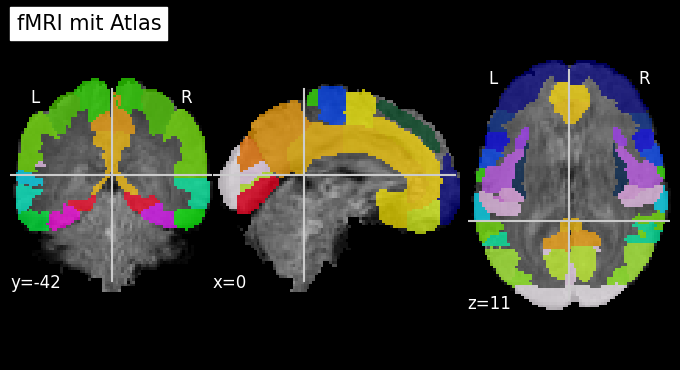

In [82]:
plotting.plot_roi(atlas_filename, bg_img=Nifti_img.slicer[:, :, :, 0], title='fMRI mit Atlas')

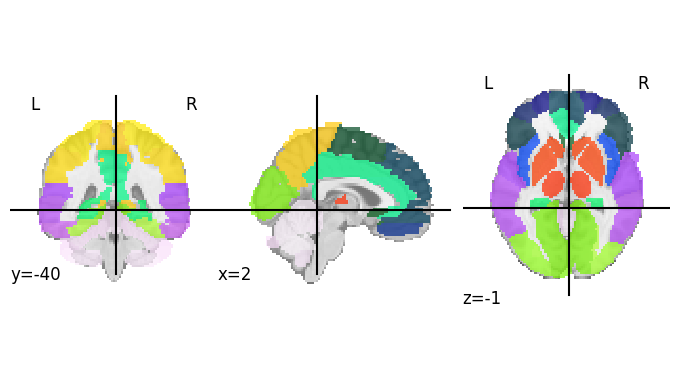

In [83]:
dataset1=datasets.fetch_atlas_aal(version='SPM12', data_dir=None, url=None, resume=True, verbose=1)
atlas_filename1 = dataset1.maps
labels1 = dataset1.labels
plotting.plot_roi(atlas_filename1)


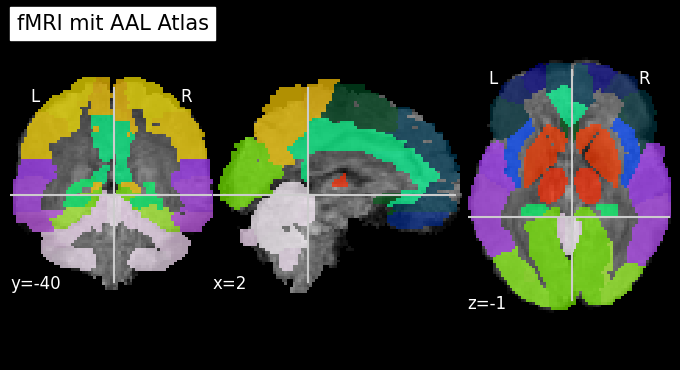

In [84]:
plotting.plot_roi(atlas_filename1, bg_img=Nifti_img.slicer[:, :, :, 300], title='fMRI mit AAL Atlas')

In [92]:
from nilearn.maskers import NiftiLabelsMasker
masker = NiftiLabelsMasker(labels_img=atlas_filename, standardize=True)

In [86]:
time_series = masker.fit_transform(Nifti_img, confounds=None)

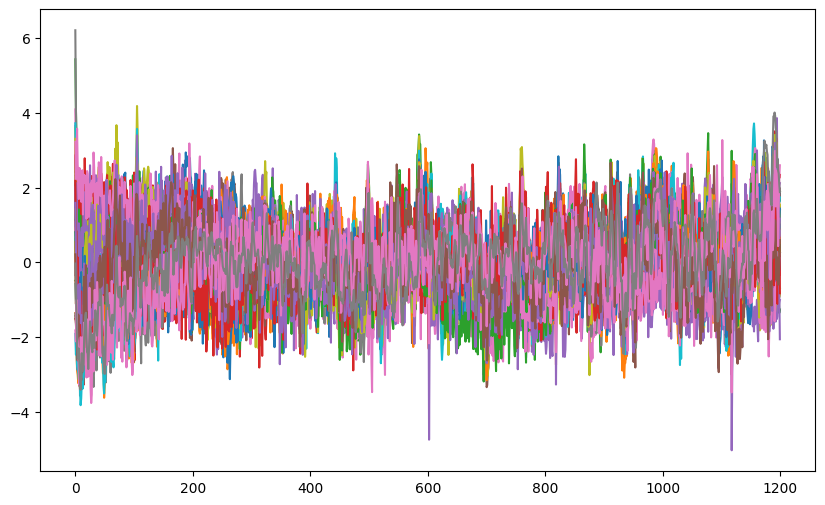

In [87]:
plt.figure(figsize=(10,6))
plt.plot(time_series)

In [88]:
from nilearn.connectome import ConnectivityMeasure

correlation_measure = ConnectivityMeasure(
    kind="correlation",
    standardize="zscore_sample",
)
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

In [93]:
len(correlation_matrix)

48

In [91]:
import numpy as np

from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 8),
    labels=labels,
    vmax=0.8,
    vmin=-0.8,
    title="Confounds",
    reorder=True,
)

ValueError: Length of labels unequal to length of matrix.

In [ ]:
print(time_series.shape)

(1200, 116)
